*Currently running with the "base" conda env, the "flc_local" env is giving me trouble*

## Maritime Incidents Data
* Downloaded from https://www.dco.uscg.mil/Our-Organization/Assistant-Commandant-for-Prevention-Policy-CG-5P/Inspections-Compliance-CG-5PC-/Office-of-Investigations-Casualty-Analysis/Marine-Casualty-and-Pollution-Data-for-Researchers/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as feature
import xarray as xr

In [2]:
column_names = [
    "activity_id", "case_id", "datetime", "fk_d_vessel",
    "vessel_id", "vin", "vessel_name", "vessel_service", "vessel_class",
    "vessel_type", "vessel_subtype", "flag_desc", "vessel_activity_role_desc",
    "waterway_name", "event_type", "event_class", "event_subclass",
    "damage_status", "latitude", "longitude"
]

In [3]:
file_path = "../Maritime_Incidents_Data/MISLE_DATA/MisleVslEvents.txt"

In [4]:
df = pd.read_csv(file_path, sep='\t', header=None, names=column_names, encoding='latin-1')

In [5]:
print(df.iloc[16].to_string())

activity_id                                        4616229
case_id                                           639647.0
datetime                       2013-06-08 03:10:00.0000000
fk_d_vessel                                        6354879
vessel_id                                         452354.0
vin                                                MS3999L
vessel_name                                          MYLES
vessel_service                       Passenger (Inspected)
vessel_class                                Passenger Ship
vessel_type                                     Water Taxi
vessel_subtype                       General (More Than 6)
flag_desc                                    UNITED STATES
vessel_activity_role_desc    Involved in a Marine Casualty
waterway_name                          PROVINCETOWN HARBOR
event_type                                        Flooding
event_class                   Progressive - out of control
event_subclass                                         N

In [6]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [7]:
target_date = '2024-07-31'

filtered_df = df[df['datetime'].dt.date == pd.to_datetime(target_date).date()]


In [8]:
filtered_df

,activity_id,case_id,datetime,fk_d_vessel,vessel_id,vin,vessel_name,vessel_service,vessel_class,vessel_type,vessel_subtype,flag_desc,vessel_activity_role_desc,waterway_name,event_type,event_class,event_subclass,damage_status,latitude,longitude


/var/folders/s0/p4kwg0r17s59t6f4g9btngzw0000gn/T/ipykernel_5805/1063908649.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


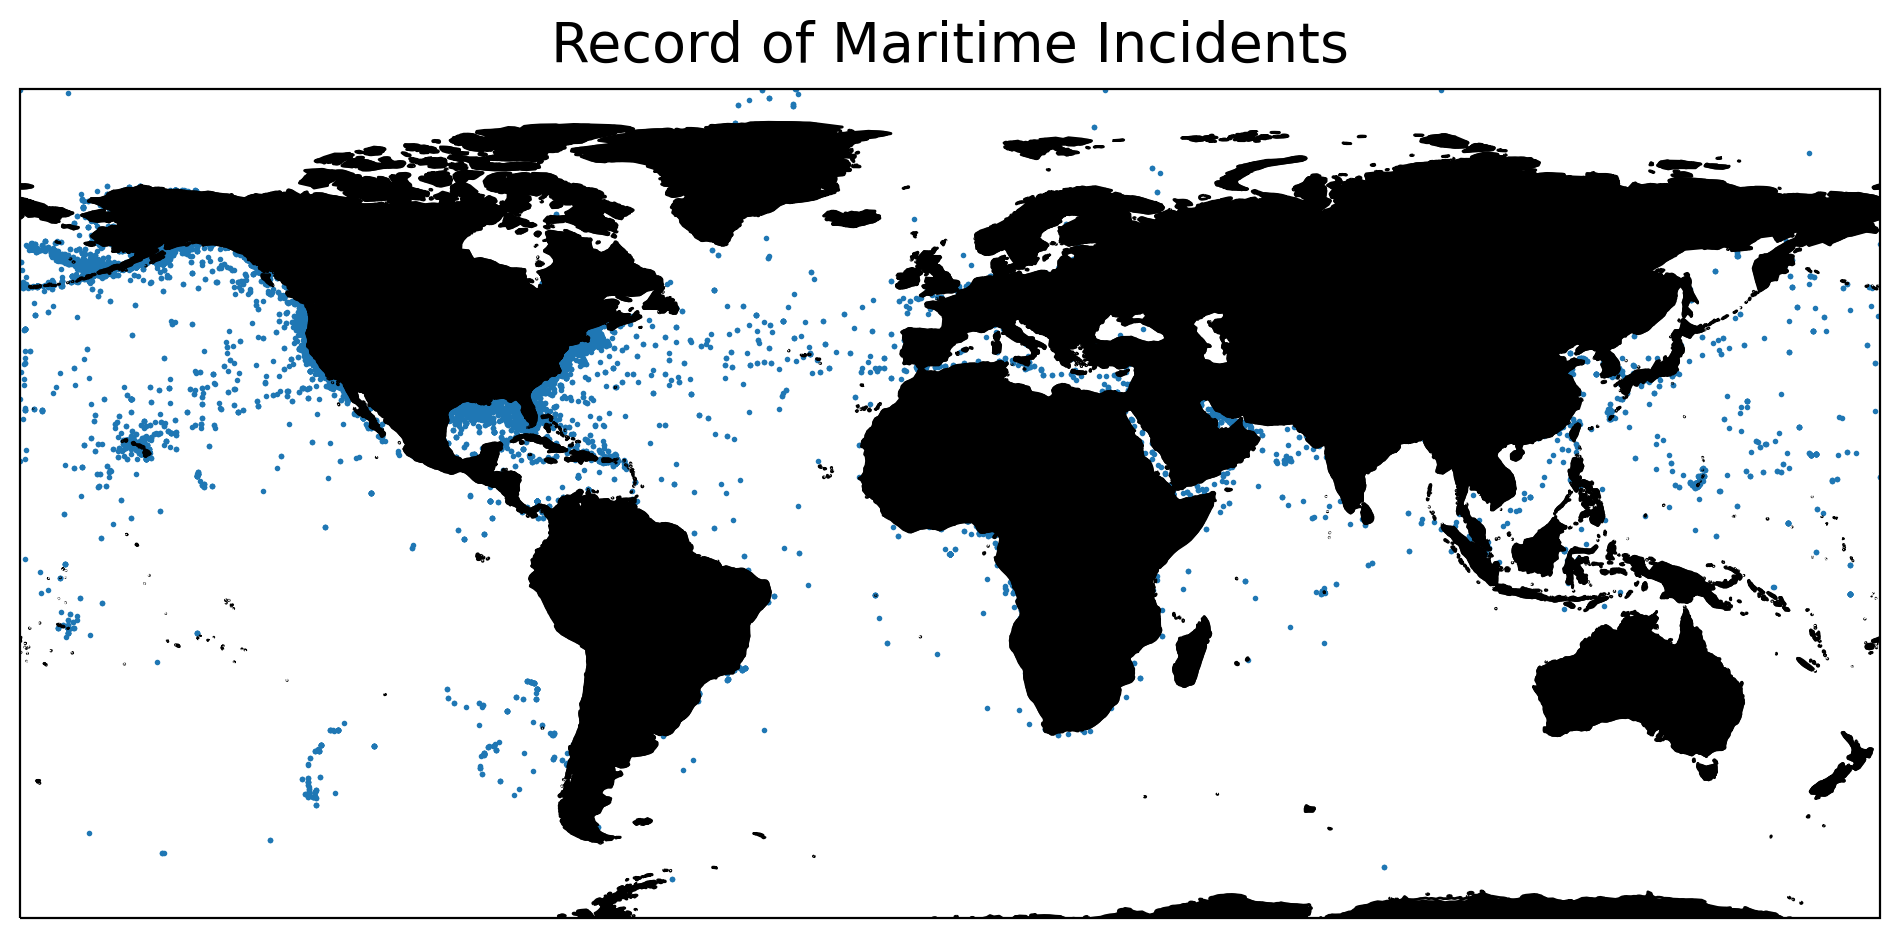

In [9]:
projection=ccrs.PlateCarree(central_longitude=0)

fig,ax=plt.subplots(1, figsize=(12,12),subplot_kw={'projection': projection})

c=ax.scatter(df.longitude, df.latitude, s=1)

ax.set_title("Record of Maritime Incidents", fontsize=20, pad=10)
ax.coastlines(resolution='50m', color='black', linewidth=1)
ax.add_feature(feature.LAND, zorder=100, edgecolor='#000', facecolor='#000')

fig.set_dpi(200)
#fig.savefig(location_title, dpi=200, bbox_inches='tight')
fig.show()

/var/folders/s0/p4kwg0r17s59t6f4g9btngzw0000gn/T/ipykernel_5805/2849413684.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


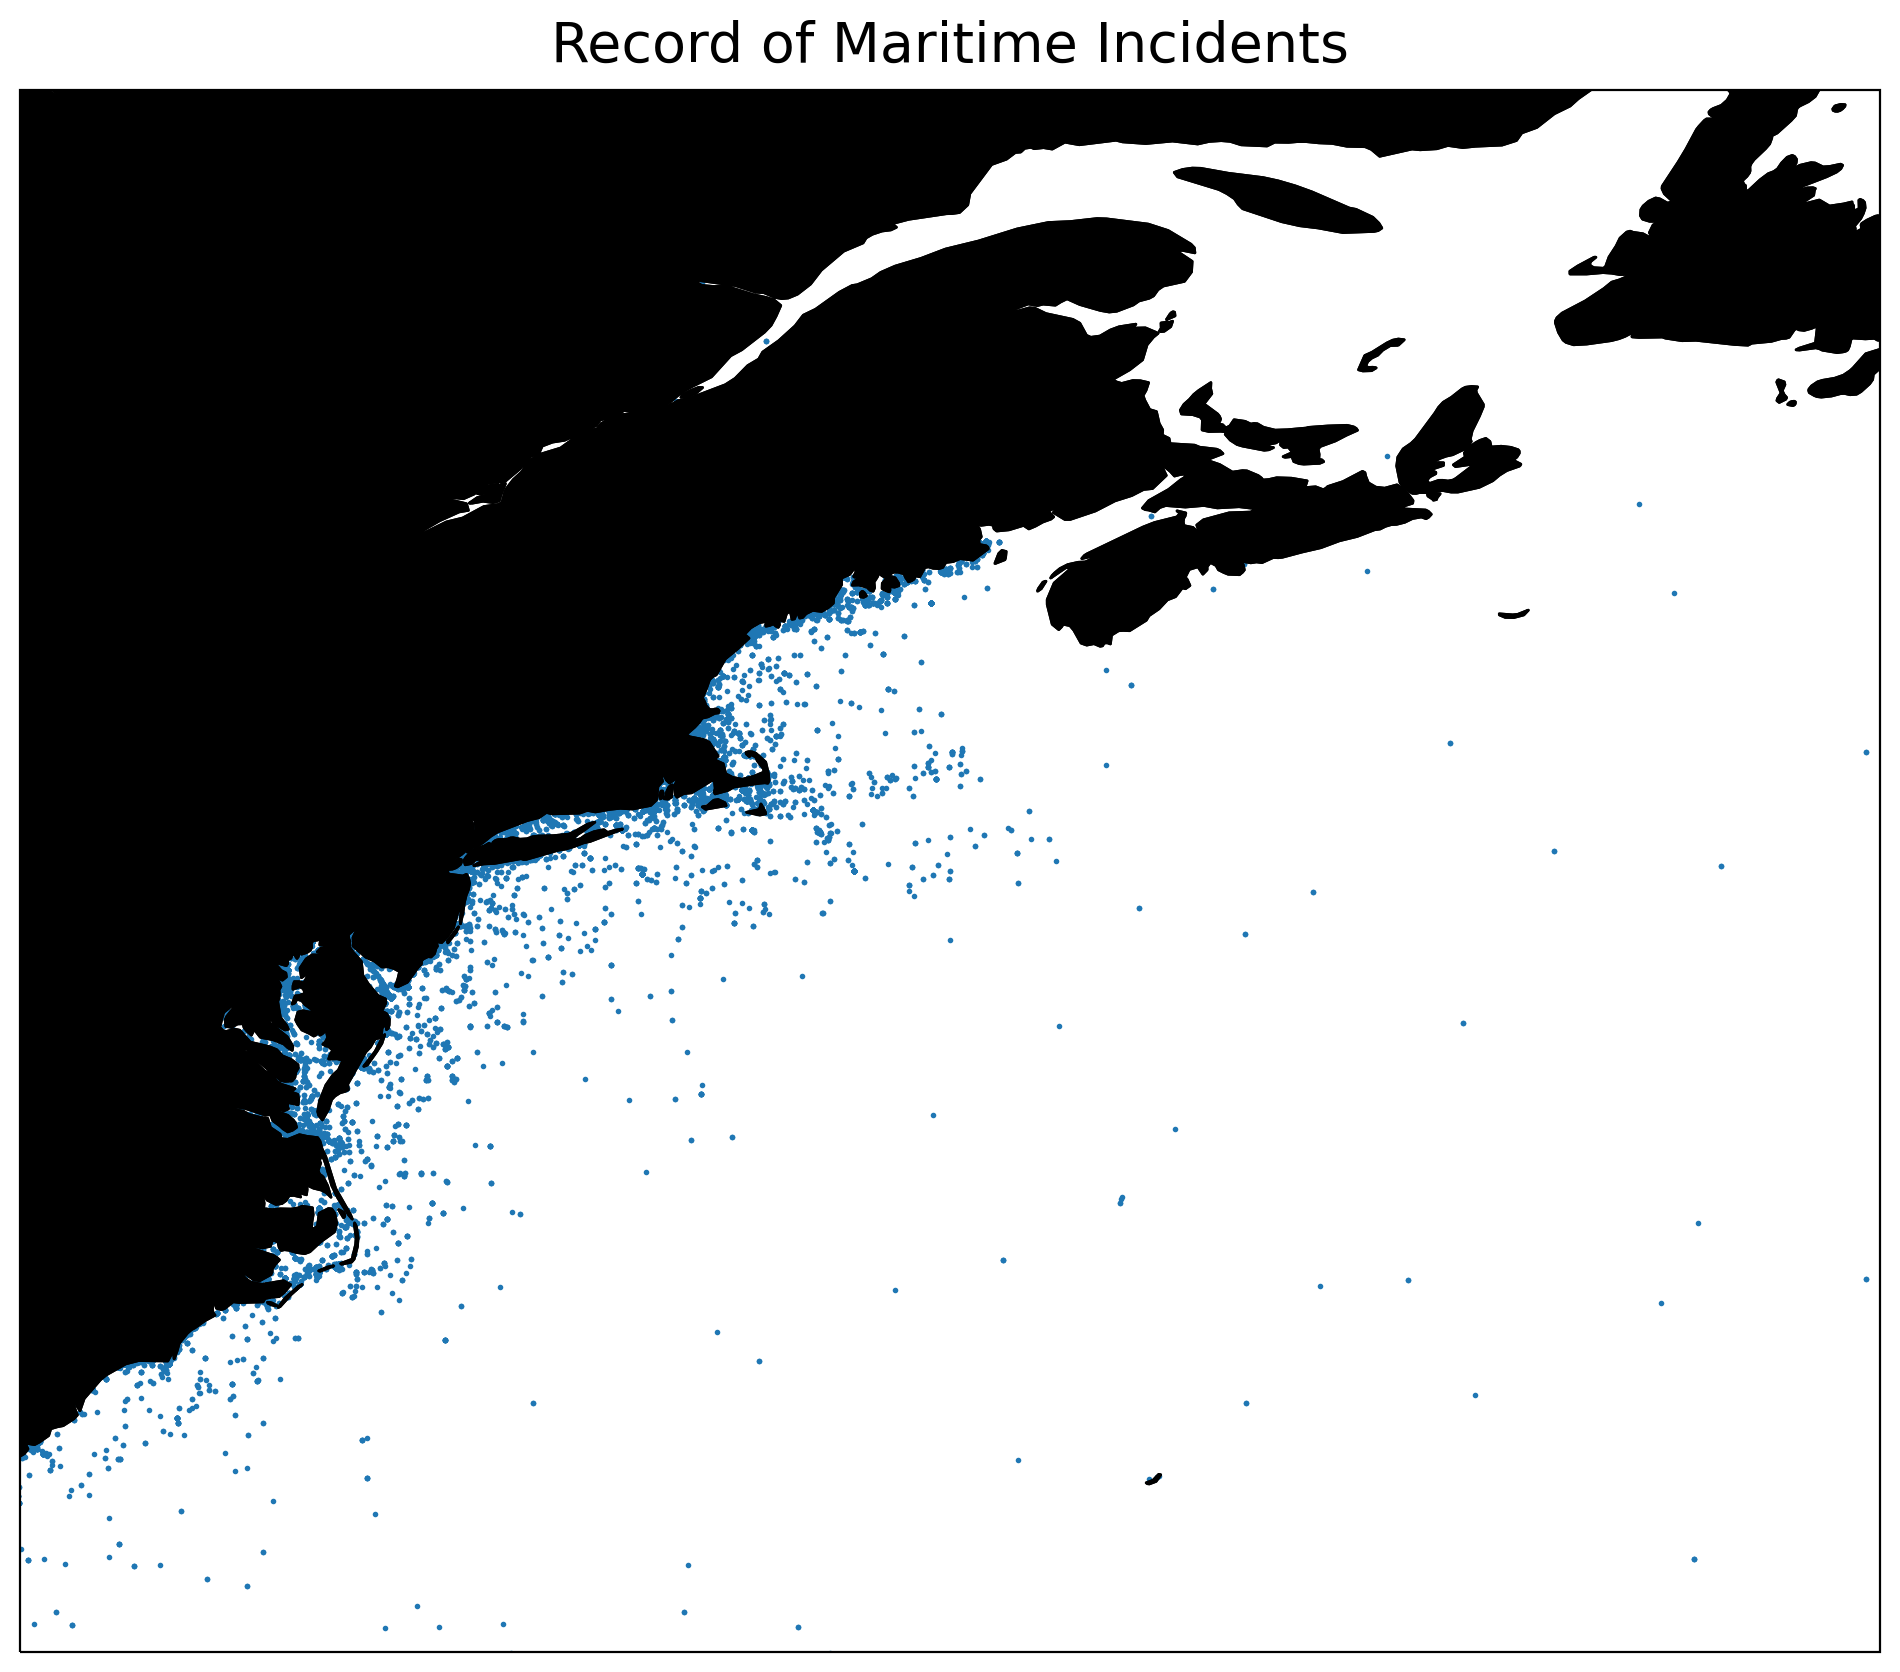

In [10]:
#--- Gulf Stream
latitude_north = 51
latitude_south = 30
longitude_west = -80
longitude_east = -55

projection=ccrs.PlateCarree(central_longitude=0)

fig,ax=plt.subplots(1, figsize=(12,12),subplot_kw={'projection': projection})

c=ax.scatter(df.longitude, df.latitude, s=1)

ax.set_title("Record of Maritime Incidents", fontsize=20, pad=10)
ax.coastlines(resolution='50m', color='black', linewidth=1)
ax.add_feature(feature.LAND, zorder=100, edgecolor='#000', facecolor='#000')
ax.set_extent([longitude_west, longitude_east, latitude_south, latitude_north], crs=ccrs.PlateCarree())

fig.set_dpi(200)
#fig.savefig(location_title, dpi=200, bbox_inches='tight')
fig.show()